# MapClassify

In [1]:
import geopandas as gpd

In [2]:
url = "https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2022/UFs/MA/MA_Municipios_2022.zip"

In [5]:
ma = gpd.read_file(url)
ma.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,2100055,Açailândia,MA,5805.159,"POLYGON ((-47.40208 -5.03469, -47.47673 -5.046..."
1,2100105,Afonso Cunha,MA,371.338,"POLYGON ((-43.28145 -4.31924, -43.42924 -4.223..."
2,2100154,Água Doce do Maranhão,MA,442.292,"POLYGON ((-42.17657 -2.84415, -42.17639 -2.844..."
3,2100204,Alcântara,MA,1167.964,"MULTIPOLYGON (((-44.57175 -2.21957, -44.56274 ..."
4,2100303,Aldeias Altas,MA,1942.121,"POLYGON ((-43.3651 -4.64627, -43.36676 -4.6442..."


pip install mapclassify

In [4]:
import mapclassify

In [6]:
mapclassify.EqualInterval(ma['AREA_KM2'], k=5)

EqualInterval

      Interval         Count
----------------------------
[   79.21,  2691.60] |   190
( 2691.60,  5303.99] |    17
( 5303.99,  7916.38] |     5
( 7916.38, 10528.77] |     3
(10528.77, 13141.16] |     2

In [7]:
mapclassify.Quantiles(ma['AREA_KM2'], k=5)

Quantiles

      Interval         Count
----------------------------
[   79.21,   447.17] |    44
(  447.17,   743.53] |    43
(  743.53,  1166.17] |    43
( 1166.17,  1928.88] |    43
( 1928.88, 13141.16] |    44

In [8]:
mapclassify.JenksCaspall(ma['AREA_KM2'], k=5)

JenksCaspall

      Interval         Count
----------------------------
[   79.21,   591.62] |    63
(  591.62,  1144.15] |    65
( 1144.15,  2284.22] |    57
( 2284.22,  4837.17] |    19
( 4837.17, 13141.16] |    13

o natural breaks é mais proximo desse aqui

In [9]:
mapclassify.FisherJenks(ma['AREA_KM2'], k=5)

/home/scosta/dev/cdpython/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577: UserWarning: Numba not installed. Using slow pure python version.
  exec(code_obj, self.user_global_ns, self.user_ns)


FisherJenks

      Interval         Count
----------------------------
[   79.21,  1193.38] |   136
( 1193.38,  2720.27] |    55
( 2720.27,  5201.93] |    16
( 5201.93,  8861.72] |     8
( 8861.72, 13141.16] |     2

https://numba.pydata.org/

In [10]:
mapclassify.FisherJenks(ma['AREA_KM2'], k=5)

FisherJenks

      Interval         Count
----------------------------
[   79.21,  1193.38] |   136
( 1193.38,  2720.27] |    55
( 2720.27,  5201.93] |    16
( 5201.93,  8861.72] |     8
( 8861.72, 13141.16] |     2

In [11]:
cl = mapclassify.FisherJenks(ma['AREA_KM2'], k=5)
cl

FisherJenks

      Interval         Count
----------------------------
[   79.21,  1193.38] |   136
( 1193.38,  2720.27] |    55
( 2720.27,  5201.93] |    16
( 5201.93,  8861.72] |     8
( 8861.72, 13141.16] |     2

In [12]:
type(cl)

mapclassify.classifiers.FisherJenks

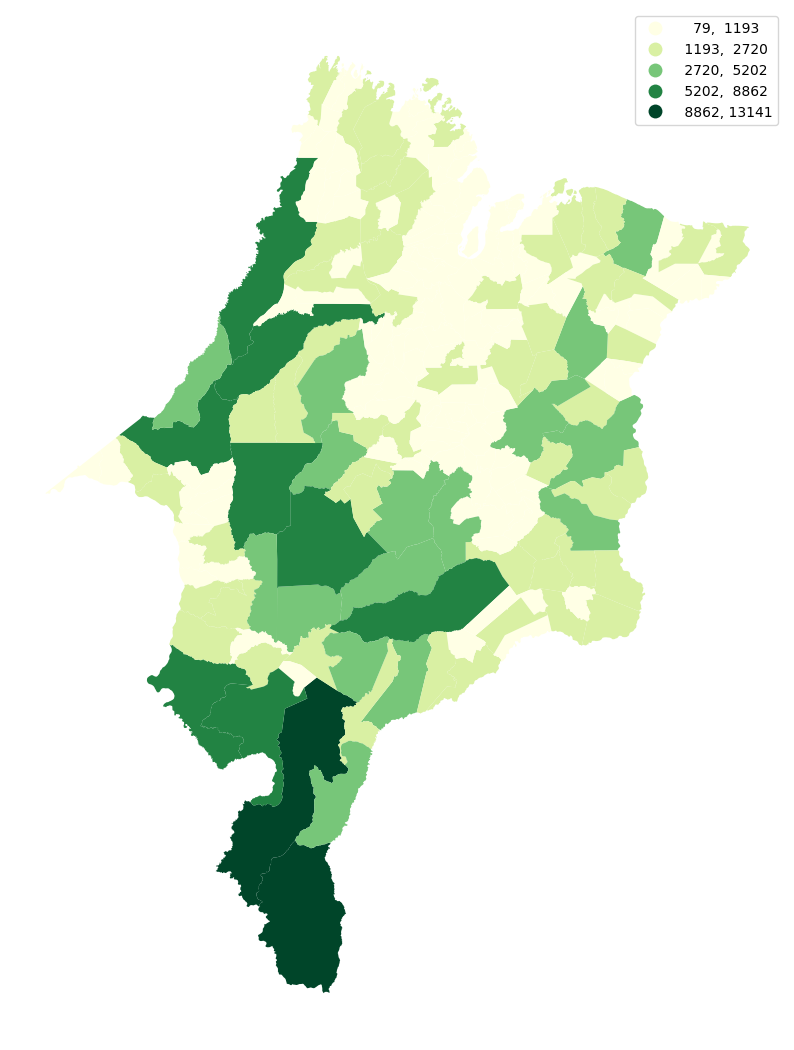

In [13]:
ax = ma.plot(
    column="AREA_KM2",  # Data to plot
    scheme="naturalbreaks",  # Classification scheme
    cmap="YlGn",  # Color palette
    legend=True,  # Add legend
   legend_kwds={"fmt": "{:.0f}"},  # Remove decimals in legend
    figsize=(10,100)
)
ax.set_axis_off();

https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html

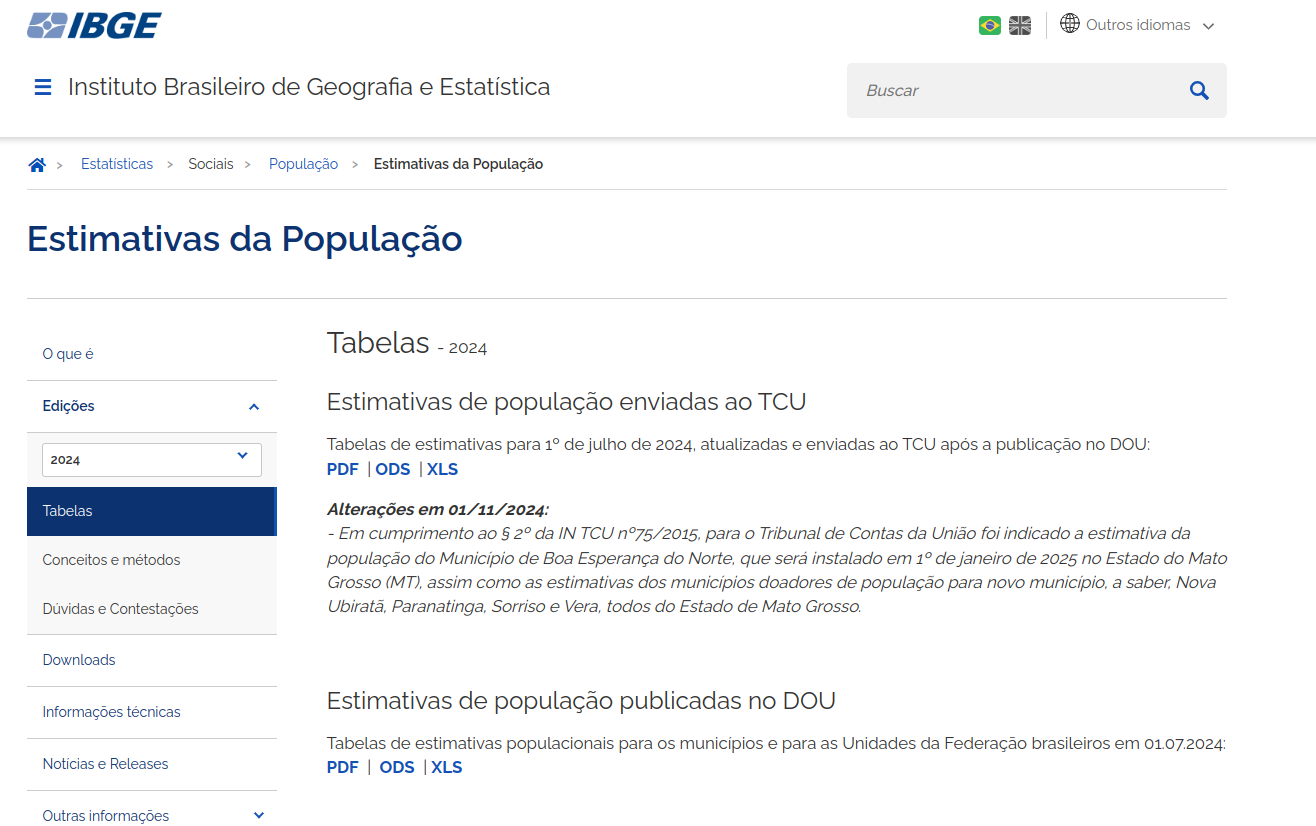

In [14]:
import pandas as pd

In [16]:
url_pop = "https://ftp.ibge.gov.br/Estimativas_de_Populacao/Estimativas_2024/POP2024_20241101.xls"

In [17]:
df = pd.read_excel(url_pop)

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 2.0.1 for xls Excel support Use pip or conda to install xlrd.

 pip install xlrd

In [18]:
df = pd.read_excel(url_pop)

In [20]:
df

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2024,Unnamed: 1
0,BRASIL E UNIDADES DA FEDERAÇÃO,POPULAÇÃO ESTIMADA
1,Brasil,212583750
2,Norte,18669345
3,Rondônia,1746227
4,Acre,880631
5,Amazonas,4281209
6,Roraima,716793
7,Pará,8664306
8,Amapá,802837
9,Tocantins,1577342


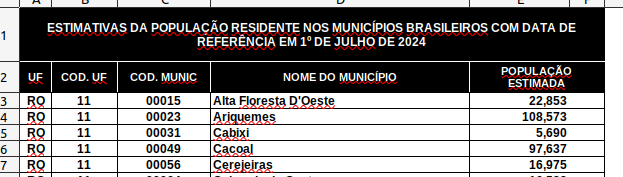

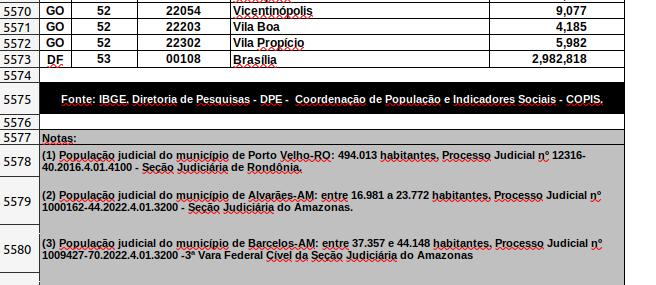

In [29]:
mun = pd.read_excel(url_pop, sheet_name="MUNICÍPIOS", skiprows=1, nrows=5571, usecols="A:E", dtype={"COD. UF": "str", "COD. MUNIC": "str", 'POPULAÇÃO ESTIMADA': 'int64'})
mun.head()

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO ESTIMADA
0,RO,11,00015,Alta Floresta D'Oeste,22853
1,RO,11,00023,Ariquemes,108573
2,RO,11,00031,Cabixi,5690
3,RO,11,00049,Cacoal,97637
4,RO,11,00056,Cerejeiras,16975


In [26]:
ma.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,2100055,Açailândia,MA,5805.159,"POLYGON ((-47.40208 -5.03469, -47.47673 -5.046..."
1,2100105,Afonso Cunha,MA,371.338,"POLYGON ((-43.28145 -4.31924, -43.42924 -4.223..."
2,2100154,Água Doce do Maranhão,MA,442.292,"POLYGON ((-42.17657 -2.84415, -42.17639 -2.844..."
3,2100204,Alcântara,MA,1167.964,"MULTIPOLYGON (((-44.57175 -2.21957, -44.56274 ..."
4,2100303,Aldeias Altas,MA,1942.121,"POLYGON ((-43.3651 -4.64627, -43.36676 -4.6442..."


In [30]:
mun['cod_mun_str'] = mun["COD. UF"] + mun['COD. MUNIC']

In [31]:
mun.head()

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO ESTIMADA,cod_mun_str
0,RO,11,00015,Alta Floresta D'Oeste,22853,1100015
1,RO,11,00023,Ariquemes,108573,1100023
2,RO,11,00031,Cabixi,5690,1100031
3,RO,11,00049,Cacoal,97637,1100049
4,RO,11,00056,Cerejeiras,16975,1100056


In [32]:
gdf_ma_merge = pd.merge (ma, mun, how='left', left_on='CD_MUN', right_on='cod_mun_str')
gdf_ma_merge.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO ESTIMADA,cod_mun_str
0,2100055,Açailândia,MA,5805.159,"POLYGON ((-47.40208 -5.03469, -47.47673 -5.046...",MA,21,00055,Açailândia,110506,2100055
1,2100105,Afonso Cunha,MA,371.338,"POLYGON ((-43.28145 -4.31924, -43.42924 -4.223...",MA,21,00105,Afonso Cunha,6296,2100105
2,2100154,Água Doce do Maranhão,MA,442.292,"POLYGON ((-42.17657 -2.84415, -42.17639 -2.844...",MA,21,00154,Água Doce do Maranhão,12446,2100154
3,2100204,Alcântara,MA,1167.964,"MULTIPOLYGON (((-44.57175 -2.21957, -44.56274 ...",MA,21,00204,Alcântara,18774,2100204
4,2100303,Aldeias Altas,MA,1942.121,"POLYGON ((-43.3651 -4.64627, -43.36676 -4.6442...",MA,21,00303,Aldeias Altas,23782,2100303


## Cloropeths

In [33]:
mapclassify.EqualInterval(gdf_ma_merge['POPULAÇÃO ESTIMADA'], k=10)

EqualInterval

        Interval           Count
--------------------------------
[   4412.00,  112776.50] |   210
( 112776.50,  221141.00] |     4
( 221141.00,  329505.50] |     2
( 329505.50,  437870.00] |     0
( 437870.00,  546234.50] |     0
( 546234.50,  654599.00] |     0
( 654599.00,  762963.50] |     0
( 762963.50,  871328.00] |     0
( 871328.00,  979692.50] |     0
( 979692.50, 1088057.00] |     1

In [34]:
mapclassify.Quantiles(gdf_ma_merge['POPULAÇÃO ESTIMADA'], k=10)

Quantiles

        Interval           Count
--------------------------------
[   4412.00,    7223.80] |    22
(   7223.80,   10426.40] |    22
(  10426.40,   11842.80] |    21
(  11842.80,   14397.20] |    22
(  14397.20,   17592.00] |    22
(  17592.00,   20862.80] |    21
(  20862.80,   25038.20] |    22
(  25038.20,   33487.20] |    21
(  33487.20,   50067.60] |    22
(  50067.60, 1088057.00] |    22

In [36]:
mapclassify.FisherJenks(gdf_ma_merge['POPULAÇÃO ESTIMADA'], k=10)

/home/scosta/dev/cdpython/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577: UserWarning: Numba not installed. Using slow pure python version.
  exec(code_obj, self.user_global_ns, self.user_ns)


FisherJenks

        Interval           Count
--------------------------------
[   4412.00,   12668.00] |    74
(  12668.00,   20413.00] |    55
(  20413.00,   30799.00] |    36
(  30799.00,   48036.00] |    30
(  48036.00,   67999.00] |     7
(  67999.00,   88167.00] |     5
(  88167.00,  118295.00] |     4
( 118295.00,  182241.00] |     3
( 182241.00,  285146.00] |     2
( 285146.00, 1088057.00] |     1

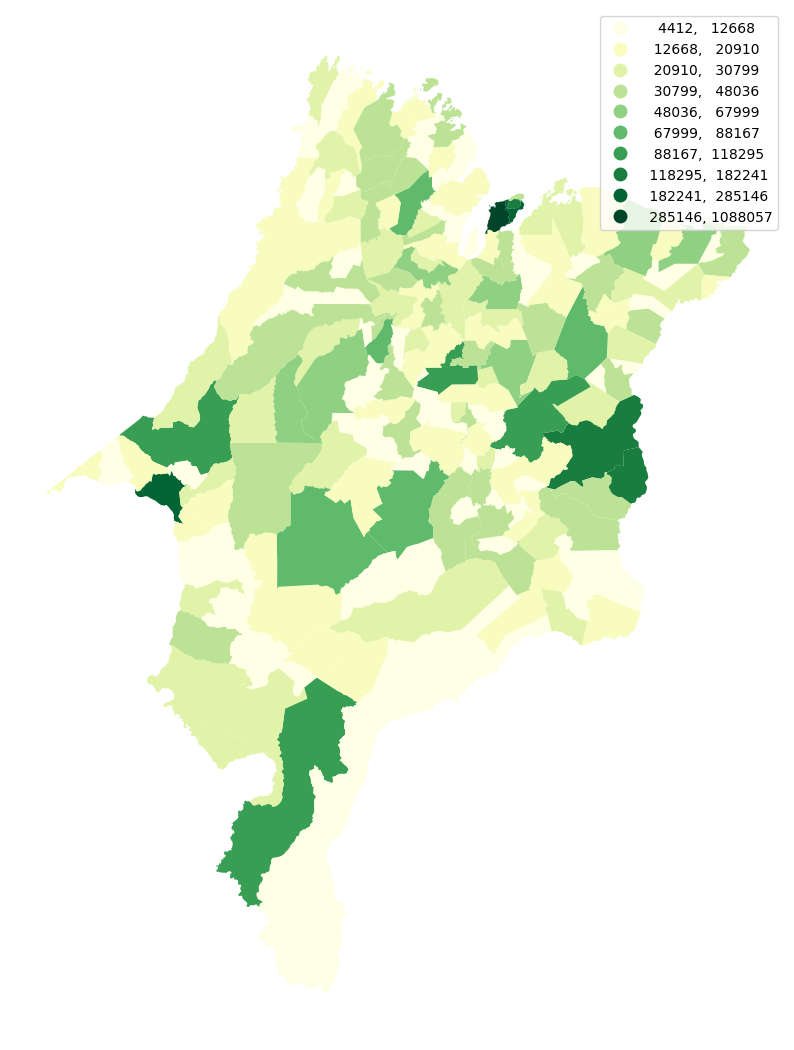

In [35]:
ax = gdf_ma_merge.plot(
    column="POPULAÇÃO ESTIMADA",  # Data to plot
    scheme="naturalbreaks",  # Classification scheme
    k = 10,
    cmap="YlGn",  # Color palette
    legend=True,  # Add legend
    legend_kwds={"fmt": "{:.0f}"},  # Remove decimals in legend
    figsize=(10,100)
)
ax.set_axis_off();